In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import metrics
import warnings

warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_excel('data/Telco_customer_churn.xlsx')

In [3]:
dataset

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [4]:
def data_info(dataset):
    cols = []
    unique = []
    n_uniques = []
    dtypes = []
    nulls = []

    for col in dataset.columns:
        cols.append(col)
        dtypes.append(dataset[col].dtype)
        n_uniques.append(dataset[col].nunique())
        unique.append(dataset[col].unique())
        nulls.append(dataset[col].isna().sum())

    return pd.DataFrame({'Columns': cols, 'n_uniques': n_uniques,
                         'unique': unique, 'dtypes': dtypes, "NULLS": nulls
                         })

In [5]:
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,CustomerID,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",object,0
1,Count,1,[1],int64,0
2,Country,1,[United States],object,0
3,State,1,[California],object,0
4,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",object,0
5,Zip Code,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",int64,0
6,Lat Long,1652,"[33.964131, -118.272783, 34.059281, -118.30742...",object,0
7,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
8,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
9,Gender,2,"[Male, Female]",object,0


In [6]:
dataset.drop(['Count', 'Country', 'CustomerID', 'State', 'Zip Code', 'Lat Long', 'Churn Label'], axis=1, inplace=True)

In [7]:
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'], errors='coerce')

In [8]:
dataset['Total Charges'].fillna(dataset['Total Charges'].median(), inplace=True)

In [9]:
dataset.drop(['Churn Reason'], inplace=True, axis=1)

In [10]:
dataset.drop(['City'], inplace=True, axis=1)

In [11]:
cont = {'Month-to-month': 0, 'Two year': 2, 'One year': 1}

In [12]:
dataset.Contract.replace(cont, inplace=True)

In [13]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [14]:
X = dataset.drop(['Churn Value'], axis=1).values
y = dataset['Churn Value'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [153]:
model = Sequential()
model.add(Dense(units=150,input_dim=X_train.shape[1],activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 150)               5100      
                                                                 
 batch_normalization_42 (Bat  (None, 150)              600       
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (None, 100)               15100     
                                                                 
 batch_normalization_43 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (None, 50)                5050      
                                                                 
 batch_normalization_44 (Bat  (None, 50)             

In [154]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
sgd = SGD(learning_rate=0.001, momentum=0.01)
rmsprop = RMSprop(learning_rate=0.0001, rho=0.9,epsilon=1e-07)
adam = Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.99)

In [155]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [156]:
e = EarlyStopping(monitor='val_loss', patience=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=150, validation_split=0.1,callbacks=e)

Epoch 1/50
36/36 [==============================] - 2s 8ms/step - loss: 0.4157 - accuracy: 0.8168 - val_loss: 0.4455 - val_accuracy: 0.8848
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.9133 - val_loss: 0.3391 - val_accuracy: 0.8848
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9246 - val_loss: 0.2964 - val_accuracy: 0.8698
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1769 - accuracy: 0.9356 - val_loss: 0.2745 - val_accuracy: 0.8698
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 0.1510 - accuracy: 0.9445 - val_loss: 0.2586 - val_accuracy: 0.8681
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9471 - val_loss: 0.2595 - val_accuracy: 0.8715


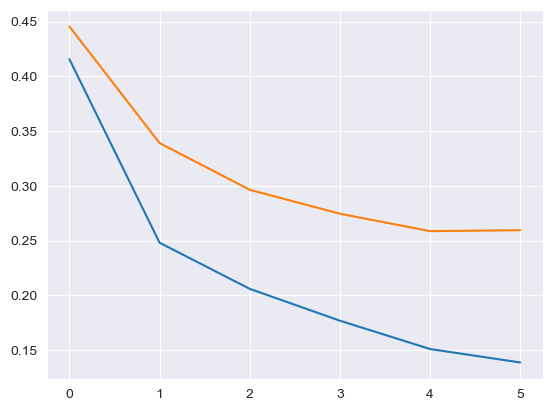

In [157]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_test')
plt.show()

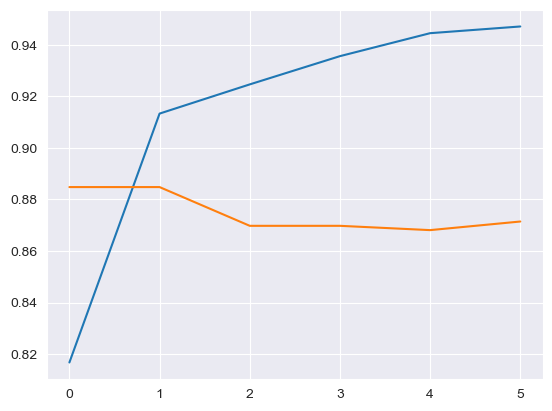

In [158]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_test')
plt.show()

In [159]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9063


[0.21957851946353912, 0.9063386917114258]

In [160]:
y_pred = model.predict(X_test)

34/34 [==============================] - 0s 1ms/step


In [161]:
y_pred_train = model.predict(X_train)

188/188 [==============================] - 0s 972us/step


In [162]:
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
y_pred

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [163]:
y_pred_train = [1 if pred > 0.5 else 0 for pred in y_pred_train]
y_pred_train

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [164]:
metrics.Classification.test(y_test, y_pred)

Accuracy: 0.9063386944181646
F1 Score: 0.7795100222717151
Recall: 0.6809338521400778
Precision: 0.9114583333333334
Confusion Matrix:
 [[783  17]
 [ 82 175]]
Specificity: 0.97875


In [165]:
metrics.Classification.train(y_train, y_pred_train)

Train Accuracy: 0.915970598062145
Train F1 Score: 0.8187387387387387
Train Recall: 0.7047146401985112
Train Precision: 0.9767841788478074
Train Confusion Matrix:
 [[4347   27]
 [ 476 1136]]
Train Specificity: 0.9938271604938271
